In [279]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 

In [4]:
from PixelEM import * 

### Compute PR for selected object  
(didn't store correctly for isoEM, so recompute just in case)

In [50]:
def compute_PR(mode=""):
    test_sample_obj = [('10workers_rand5',8),('10workers_rand3',20),('5workers_rand3',20),('5workers_rand3',28),('30workers_rand0',7),\
                            ('25workers_rand1',37),('20workers_rand2',11),('25workers_rand0',27),('5workers_rand0',1),('20workers_rand3',32)]
    tbl = []
    for test_sample in tqdm(test_sample_obj):
        sample_name= test_sample[0]
        objid = test_sample[1]
        outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
        for thresh in [-4,-2,0,2,4]:
            #for it in range(5):
            it =4
            gt_est_mask = pkl.load(open(outdir+"{}gt_est_mask_{}_thresh{}.pkl".format(mode,it,thresh)))
            # Compute PR mask based on the EM estimate mask from every iteration
            [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
            tbl.append([sample_name,objid,thresh,p,r,j])
    df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])
    return df

In [51]:
isodf = compute_PR(mode="iso")
basicdf = compute_PR(mode="").rename(columns={'P []':'P [basic]','R []':'R [basic]','J []':'J [basic]'})

In [58]:
isodf.merge(basicdf)

,sample_name,objid,thresh,P [iso],R [iso],J [iso],P [basic],R [basic],J [basic]
0,10workers_rand5,8,-4,0.965050,0.863626,0.837434,0.965050,0.863626,0.837434
1,10workers_rand5,8,-2,0.963091,0.703590,0.685117,0.963091,0.703590,0.685117
2,10workers_rand5,8,0,0.963354,0.695547,0.677618,0.963354,0.695547,0.677618
3,10workers_rand5,8,2,0.973229,0.687855,0.675081,0.973229,0.687855,0.675081
4,10workers_rand5,8,4,0.973224,0.687738,0.674967,0.973224,0.687738,0.674967
5,10workers_rand3,20,-4,0.988125,0.947582,0.936912,0.988125,0.947582,0.936912
6,10workers_rand3,20,-2,0.989246,0.663056,0.658310,0.989246,0.663056,0.658310
7,10workers_rand3,20,0,0.989246,0.663056,0.658310,0.989246,0.663056,0.658310
8,10workers_rand3,20,2,0.999479,0.654440,0.654217,0.999479,0.654440,0.654217
9,10workers_rand3,20,4,0.999479,0.653971,0.653748,0.999479,0.653971,0.653748


In [30]:
def plot_Qj_evolution(object_id,Nworker,batch_num,mode=""):
    Qj0 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_0_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj1 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_1_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj2 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_2_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj3 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_3_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    Qj4 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}Qj_4_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))

    Qjs = Qj0
    for wid in Qj0.keys():
        Qjs[wid]=[Qj0[wid],Qj1[wid],Qj2[wid],Qj3[wid],Qj4[wid]]
        plt.plot(range(5),Qjs[wid],label=wid)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    return Qjs 

In [ ]:
ls pixel_em/10workers_rand5/obj8/isoGT_

In [34]:
def Qj(object_id,Nworker,batch_num,mode=""):
    Qj4 =pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}_4_thresh0.pkl".format(Nworker,batch_num,object_id,mode) ))
    return Qj4

In [236]:
Qj(8,10,5,'isoGT_qp')

{54: 0.11193024474216001,
 148: 0.05093181648080233,
 156: 0.09550183369508271,
 161: 0.01725170271686251,
 169: 0.11417558565975601,
 193: 0.06395479380285907,
 208: 0.2065339420702043,
 234: 0.24317042137564554,
 235: 0.0,
 260: 0.007297357982186962}

In [35]:
Qj(8,10,5,'isoGT_qn')

{54: 0.04739235771666596,
 148: 0.013218854932630595,
 156: 0.22901347388107282,
 161: 0.2576614102945552,
 169: 0.06647681387342202,
 193: 0.015684107621031156,
 208: 0.020784630424618523,
 234: 0.3508734645301143,
 235: 0.43235431631742255,
 260: 0.3432226803247333}

In [37]:
ls pixel_em/10workers_rand5/obj8/isop

In [200]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):
    
    if iteration==0:    
        plt.figure()
        plt.title("MV mask")
        MV_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/MV_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(MV_mask,cmap=mpl.cm.jet_r,interpolation=None)
        plt.colorbar()
        plt.figure()
        plt.title("Megamask")
        Mega_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/mega_mask.pkl".format(Nworker,batch_num,object_id)))
        plt.imshow(Mega_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
        plt.colorbar()
    
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}gt_est_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.figure()
    plt.title("EM mask iter#{}".format(iteration))    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT iter#{}".format(iteration))
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()
    
    plt.figure()
    plt.title("pNotInT iter#{}".format(iteration))
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_not_in_mask_{}_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,iteration,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

In [80]:
Nworker=10
batch_num=5
object_id=8
mode="isoGT_"
thresh=0
pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/{}p_in_mask_4_thresh{}.pkl".format(Nworker,batch_num,object_id,mode,thresh)))

In [86]:
pInT_mask[180,400]

-inf

In [88]:
log(0)

-inf

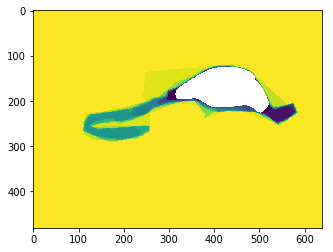

In [82]:
plt.imshow(pInT_mask)

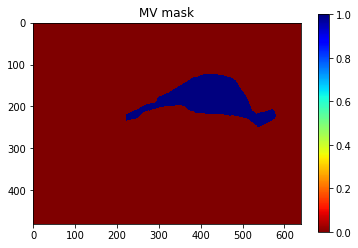

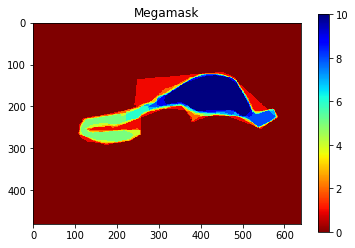

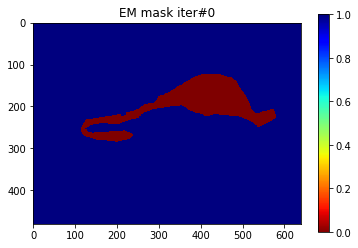

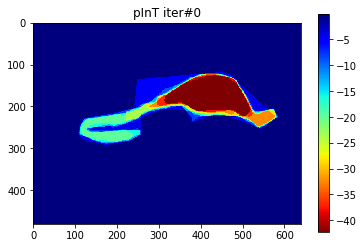

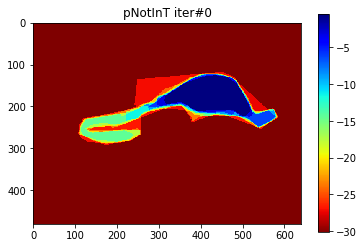

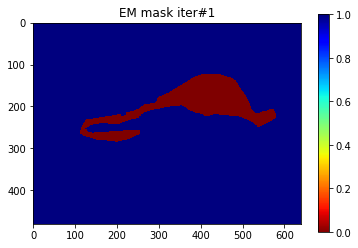

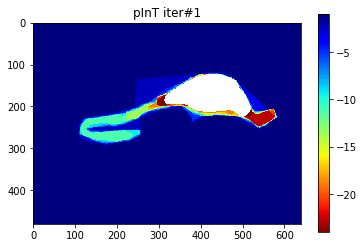

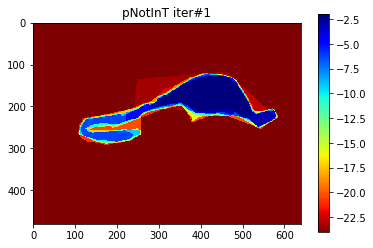

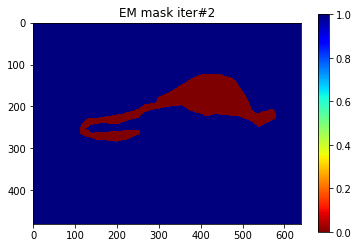

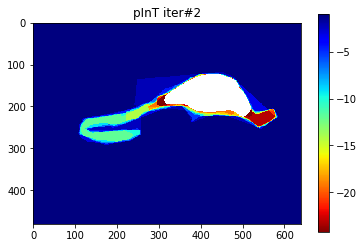

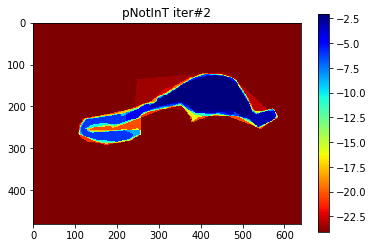

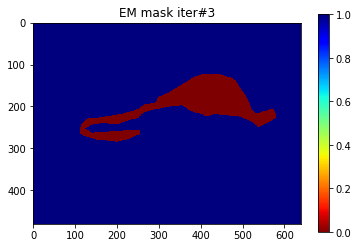

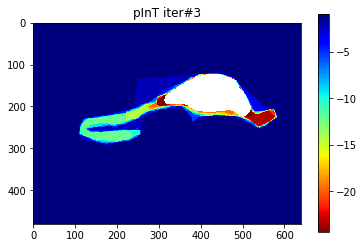

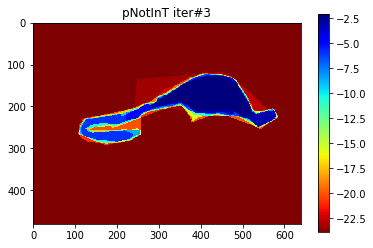

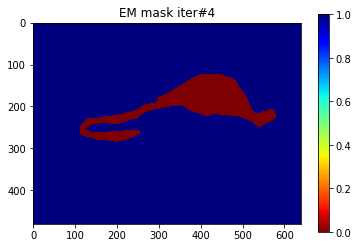

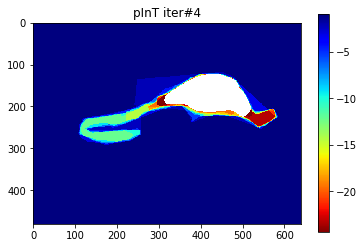

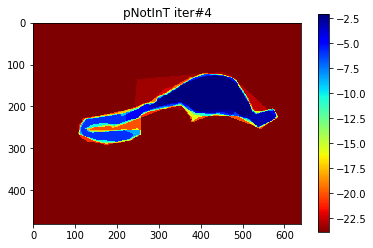

In [101]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'isoGT_',0,iteration)

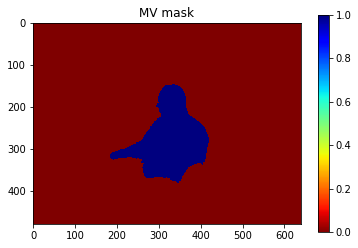

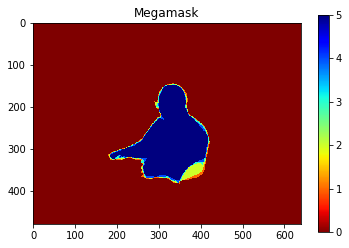

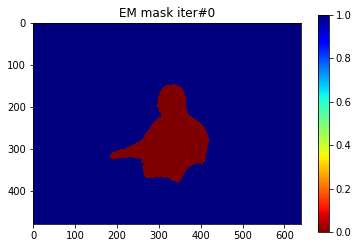

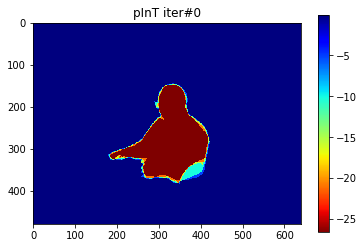

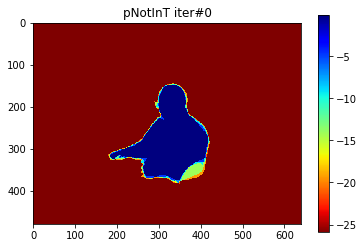

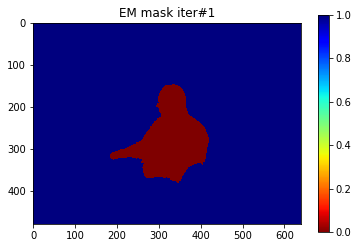

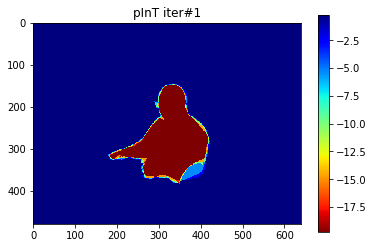

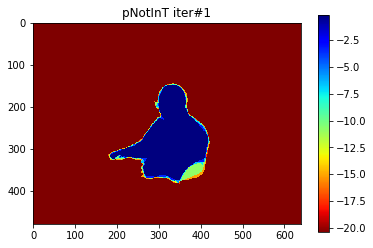

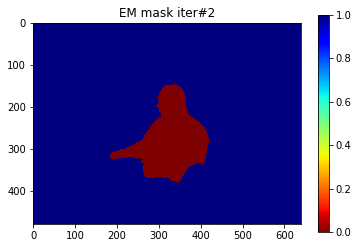

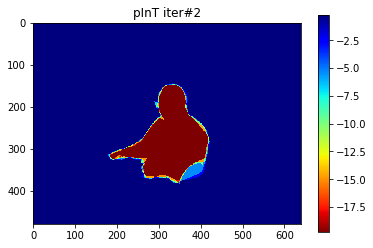

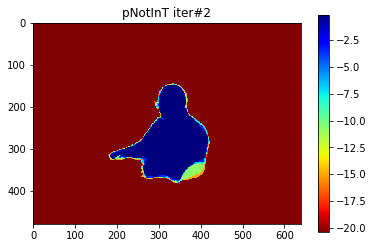

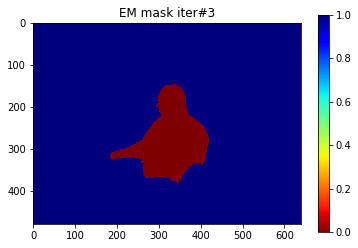

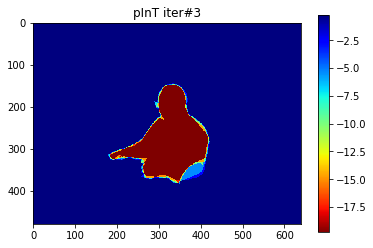

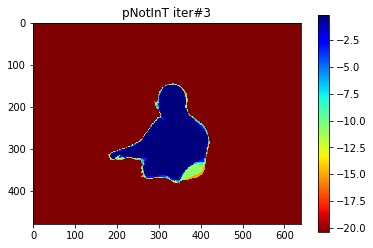

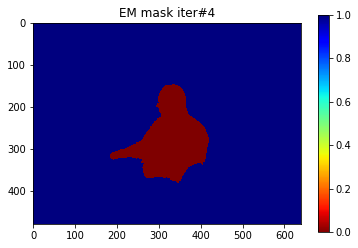

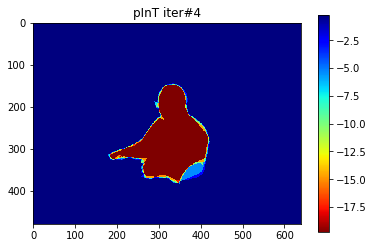

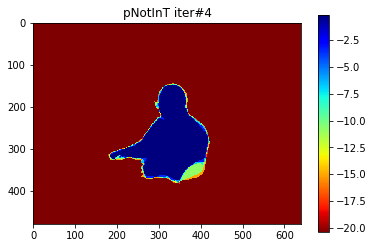

In [102]:
for iteration in range(5):
    plot_MV_EM_mask(1,5,0,'isoGT_',0,iteration)

# Ground truth worker qualities 

###### For the harder object (bag) 

GT PixelEM with iso exclusion

In [256]:
pInT = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_p_in_mask_0_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_p_in_mask_0_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_qp_4_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/isoGT_qn_4_thresh-2.pkl"))

In [271]:
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
        54          0.932075       0.919377        0.861646  0.996771  0.661085
       148          0.918229       0.874537        0.811349  0.999408  0.601445
       156          0.885521       0.716802        0.656011  0.994031  0.900730
       161          0.948322       0.664337        0.641127  0.993006  0.895213
       193          0.932652       0.901058        0.846011  0.978689  0.612246
       169          0.919561       0.893700        0.828900  0.999947  0.518300
       208          0.828789       0.924994        0.776597  0.983325  0.926762
       234          0.721851       0.616449        0.498127  0.992967  0.877807
       235          0.998802       0.522229        0.521902  0.994002  0.921245
       260          0.989243       0.604123        0.600180  0.991804  0.714080


One run from ground truth 

In [272]:
pInT = pkl.load(open("pixel_em/10workers_rand5/obj8/p_in_mask_ground_truth_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/10workers_rand5/obj8/p_not_in_ground_truth_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/qp_ground_truth_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/qn_ground_truth_thresh-2.pkl"))

In [273]:
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
        54          0.932075       0.919377        0.861646  0.996771  0.661085
       148          0.918229       0.874537        0.811349  0.999408  0.601445
       156          0.885521       0.716802        0.656011  0.994031  0.900730
       161          0.948322       0.664337        0.641127  0.993006  0.895213
       193          0.932652       0.901058        0.846011  0.978689  0.612246
       169          0.919561       0.893700        0.828900  0.999947  0.518300
       208          0.828789       0.924994        0.776597  0.983325  0.926762
       234          0.721851       0.616449        0.498127  0.992967  0.877807
       235          0.998802       0.522229        0.521902  0.994002  0.921245
       260          0.989243       0.604123        0.600180  0.991804  0.714080


# Ground truth worker qualities 

###### For the easier object (man

GT PixelEM with iso exclusion

In [260]:
pInT = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_p_in_mask_0_thresh0.pkl"))
pNotInT = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_p_in_mask_0_thresh0.pkl"))
qp = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_qp_4_thresh0.pkl"))
qn = pkl.load(open("pixel_em/5workers_rand0/obj1/isoGT_qn_4_thresh0.pkl"))

In [261]:
worker_tbl = compare_qn_qp_w_GTJaccard(1,qp,qn)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
       156          0.981662       0.946002        0.929575  0.005642  0.044338
       201          0.905256       0.989745        0.896844  0.010879  0.014703
       196          0.935739       0.977213        0.915757  0.054099  0.013675
       219          0.976457       0.975077        0.952679  0.008556  0.033558
       246          0.978341       0.955855        0.936047  0.092193  0.004533


One run from ground truth 

In [262]:
pInT = pkl.load(open("pixel_em/5workers_rand0/obj1/p_in_mask_ground_truth_thresh-2.pkl"))
pNotInT = pkl.load(open("pixel_em/5workers_rand0/obj1/p_not_in_ground_truth_thresh-2.pkl"))
qp = pkl.load(open("pixel_em/5workers_rand0/obj1/qp_ground_truth_thresh-2.pkl"))
qn = pkl.load(open("pixel_em/5workers_rand0/obj1/qn_ground_truth_thresh-2.pkl"))

In [263]:
worker_tbl = compare_qn_qp_w_GTJaccard(1,qp,qn)

 worker_id  Precision [Self]  Recall [Self]  Jaccard [Self]        qn        qp
       156          0.981662       0.946002        0.929575  0.946723  0.998388
       201          0.905256       0.989745        0.896844  0.975443  0.997790
       196          0.935739       0.977213        0.915757  0.978269  0.993787
       219          0.976457       0.975077        0.952679  0.956462  0.998007
       246          0.978341       0.955855        0.936047  0.990299  0.990378


In [136]:
def plot_GT_run_mask(object_id,Nworker,batch_num,thresh):
    EM_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/gt_est_ground_truth_mask_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.figure()
    plt.title("EM mask")    
    plt.imshow(EM_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pInT")
    pInT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/p_in_mask_ground_truth_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.imshow(pInT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

    plt.figure()
    plt.title("pNotInT")
    pnot_InT_mask = pkl.load(open("pixel_em/{}workers_rand{}/obj{}/p_not_in_ground_truth_thresh{}.pkl".format(Nworker,batch_num,object_id,thresh)))
    plt.imshow(pnot_InT_mask,alpha=1,cmap=matplotlib.cm.jet_r,interpolation=None)
    plt.colorbar()

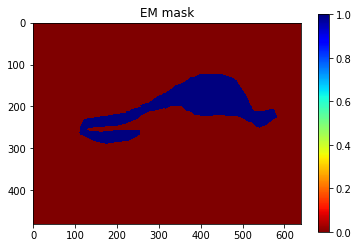

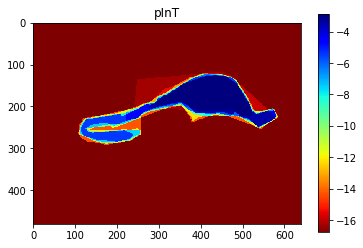

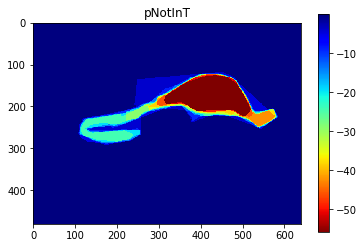

In [145]:
plot_GT_run_mask(8,10,5,-2)

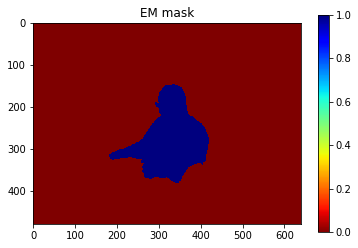

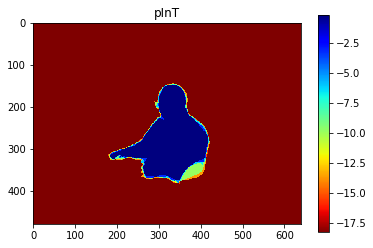

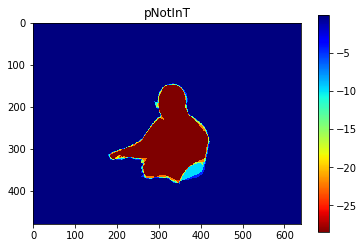

In [138]:
plot_GT_run_mask(1,5,0,0)

In [161]:
mode="Ground truth run"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    for thresh in [-4,-2,0,2,4]:
        #for it in range(5):
        it =4
        gt_est_mask = pkl.load(open(outdir+"gt_est_ground_truth_mask_thresh{}.pkl".format(thresh)))
        # Compute PR mask based on the EM estimate mask from every iteration
        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
        tbl.append([sample_name,objid,thresh,p,r,j])
df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [157]:
mode="MV"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    
    gt_est_mask = pkl.load(open(outdir+"MV_mask.pkl"))
    # Compute PR mask based on the EM estimate mask from every iteration
    [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
    tbl.append([sample_name,objid,p,r,j])
MV = pd.DataFrame(tbl,columns=["sample_name",'objid','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [ ]:
ls pixel_em/5workers_rand0/obj1/MV_prj.json

In [162]:
df.merge(MV)

,sample_name,objid,thresh,P [Ground truth run],R [Ground truth run],J [Ground truth run],P [MV],R [MV],J [MV]
0,10workers_rand5,8,-4,0.882290,0.965110,0.855019,0.973227,0.687816,0.675043
1,10workers_rand5,8,-2,0.920740,0.952794,0.880570,0.973227,0.687816,0.675043
2,10workers_rand5,8,0,0.920567,0.949180,0.877325,0.973227,0.687816,0.675043
3,10workers_rand5,8,2,0.923573,0.939972,0.872134,0.973227,0.687816,0.675043
4,10workers_rand5,8,4,0.930324,0.936903,0.875472,0.973227,0.687816,0.675043
5,5workers_rand0,1,-4,0.925597,0.990605,0.917542,0.977603,0.980179,0.958651
6,5workers_rand0,1,-2,0.925597,0.990605,0.917542,0.977603,0.980179,0.958651
7,5workers_rand0,1,0,0.969400,0.986060,0.956295,0.977603,0.980179,0.958651
8,5workers_rand0,1,2,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651
9,5workers_rand0,1,4,0.977603,0.980179,0.958651,0.977603,0.980179,0.958651


# Qj=0.6 initialization for isoGT 

In [198]:
ls pixel_em/10workers_rand5/obj8/isoQjinitGT_p_not_in_mask_0_thresh0.pkl

pixel_em/10workers_rand5/obj8/isoQjinitGT_p_not_in_mask_0_thresh0.pkl


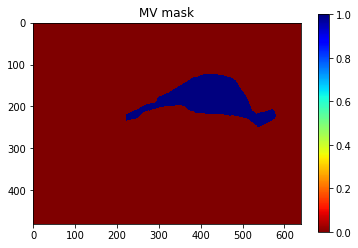

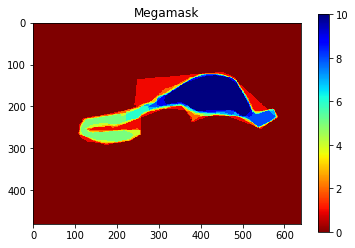

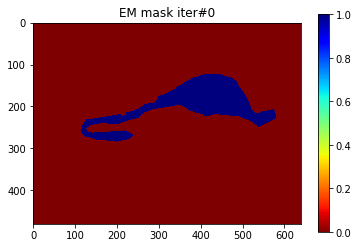

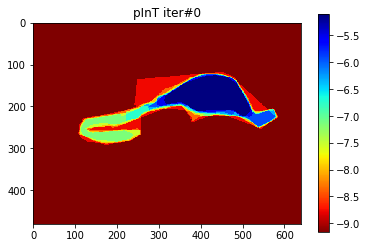

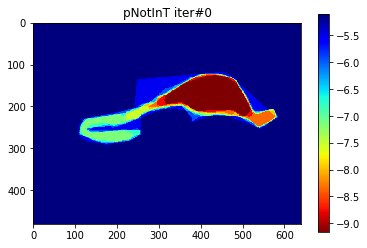

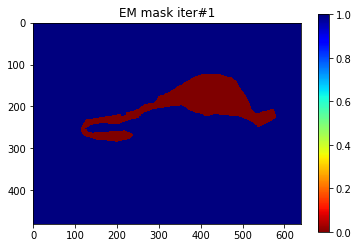

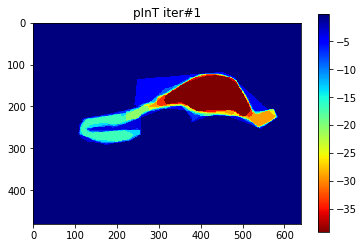

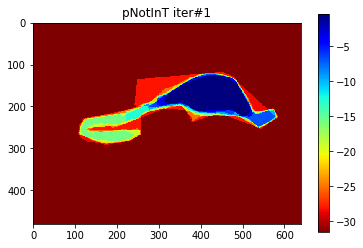

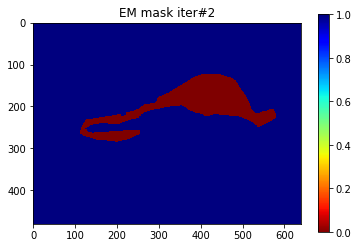

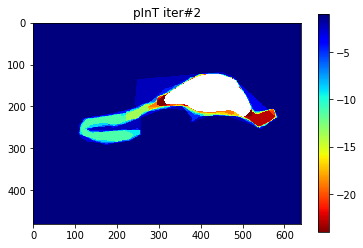

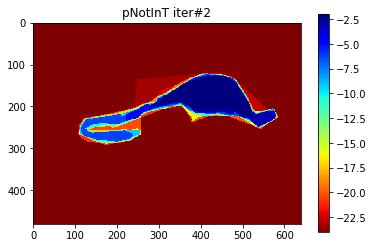

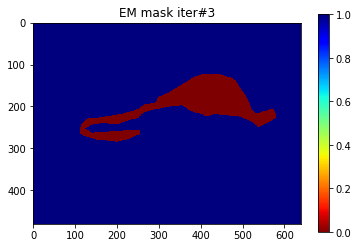

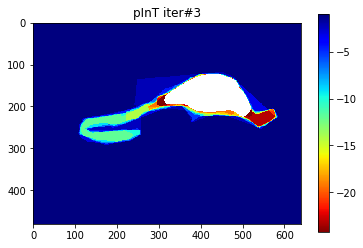

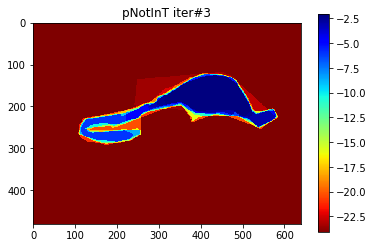

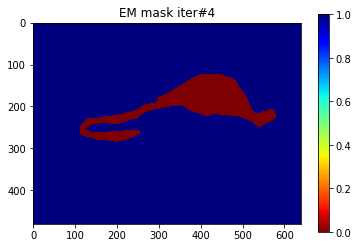

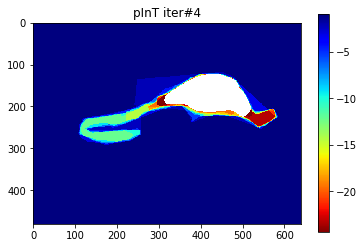

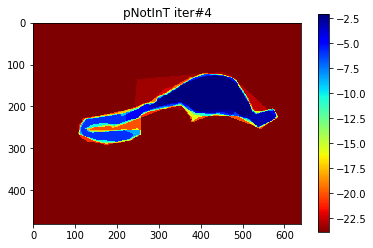

In [201]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'isoQjinitGT_',0,iteration)

In [205]:
mode="isoQjinitGT_"
test_sample_obj = [('10workers_rand5',8),('5workers_rand0',1)]
tbl = []
for test_sample in tqdm(test_sample_obj):
    sample_name= test_sample[0]
    objid = test_sample[1]
    outdir = '{}{}/obj{}/'.format(PIXEL_EM_DIR, sample_name, objid)
    for thresh in [-4,-2,0,2,4]:
        #for it in range(5):
        it =4
        gt_est_mask = pkl.load(open(outdir+"{}gt_est_mask_{}_thresh{}.pkl".format(mode,it,thresh)))
        # Compute PR mask based on the EM estimate mask from every iteration
        [p, r, j] = get_precision_recall_jaccard(gt_est_mask, get_gt_mask(objid))
        tbl.append([sample_name,objid,thresh,p,r,j])
df = pd.DataFrame(tbl,columns=["sample_name",'objid','thresh','P [{}]'.format(mode),'R [{}]'.format(mode),'J [{}]'.format(mode)])

In [207]:
df.merge(MV)

,sample_name,objid,thresh,P [isoQjinitGT_],R [isoQjinitGT_],J [isoQjinitGT_],P [MV],R [MV],J [MV]
0,10workers_rand5,8,-4,0.045479,0.522224,0.043662,0.973227,0.687816,0.675043
1,10workers_rand5,8,-2,0.032433,0.366889,0.030714,0.973227,0.687816,0.675043
2,10workers_rand5,8,0,0.011927,0.131751,0.011058,0.973227,0.687816,0.675043
3,10workers_rand5,8,2,0.008028,0.088235,0.007413,0.973227,0.687816,0.675043
4,10workers_rand5,8,4,0.000456,0.004779,0.000416,0.973227,0.687816,0.675043
5,5workers_rand0,1,-4,0.085234,1.000000,0.085234,0.977603,0.980179,0.958651
6,5workers_rand0,1,-2,0.007340,0.079323,0.006764,0.977603,0.980179,0.958651
7,5workers_rand0,1,0,0.001847,0.019821,0.001693,0.977603,0.980179,0.958651
8,5workers_rand0,1,2,0.000266,0.002826,0.000243,0.977603,0.980179,0.958651
9,5workers_rand0,1,4,0.000266,0.002826,0.000243,0.977603,0.980179,0.958651


In [235]:
qp = pkl.load(open("pixel_em/10workers_rand5/obj8/isoQjinitGT_qp_4_thresh0.pkl"))
qn = pkl.load(open("pixel_em/10workers_rand5/obj8/isoQjinitGT_qn_4_thresh0.pkl"))
worker_tbl = compare_qn_qp_w_GTJaccard(8,qn,qp)

 worker_id  Jaccard [Self]        qn        qp
        54        0.861646  0.257661  0.017252
       148        0.811349  0.343223  0.007297
       156        0.656011  0.015684  0.063955
       161        0.641127  0.066477  0.114176
       193        0.846011  0.350873  0.243170
       169        0.828900  0.432354  0.000000
       208        0.776597  0.020785  0.206534
       234        0.498127  0.013219  0.050932
       235        0.521902  0.047392  0.111930
       260        0.600180  0.229013  0.095502


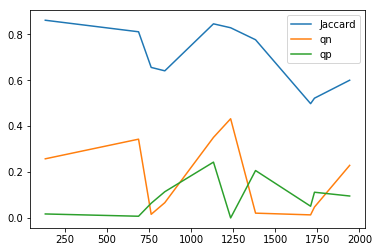

In [220]:
plt.plot(worker_tbl["Jaccard [Self]"],label='Jaccard')
plt.plot(worker_tbl["qn"],label='qn')
plt.plot(worker_tbl["qp"],label='qp')
plt.legend()

# Worker Jaccard 

In [190]:
worker_score = pd.read_csv('../computed_my_COCO_BBvals.csv',index_col=0)

In [252]:
def compare_qn_qp_w_GTJaccard(objid,qn,qp):
    worker_tbl = worker_score[(worker_score["object_id"]==objid )&(worker_score["worker_id"].isin(qn.keys()))][["worker_id","Precision [Self]","Recall [Self]","Jaccard [Self]"]]
    worker_tbl["qn"]=qn.values()
    worker_tbl["qp"]=qp.values()
    print worker_tbl.to_string(index=False)#,formatters= lambda x: "{:.2f}".format(x))
    return worker_tbl

# Compare GTLSA to GT / basic / MV 

In [ ]:
def plot_MV_EM_mask(object_id,Nworker,batch_num,mode,thresh,iteration):

In [ ]:
ls pixel_em/10workers_rand5/obj8/GTLSA_g

IOError: [Errno 2] No such file or directory: 'pixel_em/10workers_rand5/obj8/GTLSA_gt_est_mask_0_thresh-4.pkl'

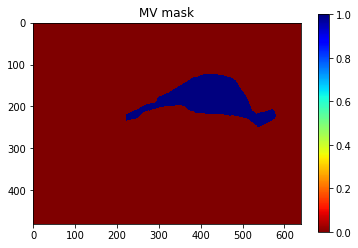

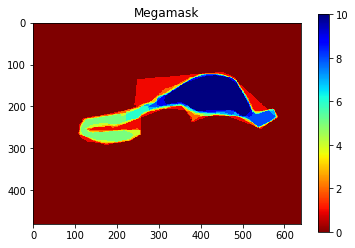

In [278]:
for iteration in range(5):
    plot_MV_EM_mask(8,10,5,'GTLSA_',-4,iteration)

### Fixed GT bug 

------------------------------------------------------------------------